# Covid 19 Daten

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
RKIData = pd.read_csv('https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.csv');

In [4]:
RKIData.head()

IdBundesland     Bundesland       Landkreis Altersgruppe Geschlecht  \
0             3  Niedersachsen  LK Wesermarsch      A15-A34          M   
1             3  Niedersachsen  LK Wesermarsch      A15-A34          W   
2             3  Niedersachsen  LK Wesermarsch      A15-A34          W   
3             3  Niedersachsen  LK Wesermarsch      A35-A59          M   
4             3  Niedersachsen  LK Wesermarsch      A35-A59          M   

   AnzahlFall  AnzahlTodesfall  ObjectId                Meldedatum  \
0           2                0    588874  2020-03-27T00:00:00.000Z   
1           2                0    588875  2020-03-22T00:00:00.000Z   
2           3                0    588876  2020-03-25T00:00:00.000Z   
3           3                0    588877  2020-03-18T00:00:00.000Z   
4           1                0    588878  2020-03-22T00:00:00.000Z   

   IdLandkreis        Datenstand  NeuerFall  NeuerTodesfall  
0         3461  31.03.2020 00:00          0              -9  
1         3461  31.03.2020 00:00          0              -9  
2         3461  31.03.2020 00:00          0              -9  
3         3461  31.03.2020 00:00          0              -9  
4         3461  31.03.2020 00:00          0              -9

In [5]:
RKIData = RKIData[RKIData.Geschlecht.str.contains("unbekannt") == False]
RKIData = RKIData[RKIData.Altersgruppe.str.contains("unbekannt") == False]

RKIData = RKIData.drop(['NeuerFall','NeuerTodesfall','ObjectId','Meldedatum','IdBundesland','IdLandkreis'],axis=1)

In [6]:
RKIData.head()

Bundesland       Landkreis Altersgruppe Geschlecht  AnzahlFall  \
0  Niedersachsen  LK Wesermarsch      A15-A34          M           2   
1  Niedersachsen  LK Wesermarsch      A15-A34          W           2   
2  Niedersachsen  LK Wesermarsch      A15-A34          W           3   
3  Niedersachsen  LK Wesermarsch      A35-A59          M           3   
4  Niedersachsen  LK Wesermarsch      A35-A59          M           1   

   AnzahlTodesfall        Datenstand  
0                0  31.03.2020 00:00  
1                0  31.03.2020 00:00  
2                0  31.03.2020 00:00  
3                0  31.03.2020 00:00  
4                0  31.03.2020 00:00

In [7]:
RKIData['Bundesland'].nunique()

16

In [8]:
RKIData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25438 entries, 0 to 25775
Data columns (total 7 columns):
Bundesland         25438 non-null object
Landkreis          25438 non-null object
Altersgruppe       25438 non-null object
Geschlecht         25438 non-null object
AnzahlFall         25438 non-null int64
AnzahlTodesfall    25438 non-null int64
Datenstand         25438 non-null object
dtypes: int64(2), object(5)
memory usage: 1.6+ MB


In [9]:
RKIData.groupby(['Altersgruppe']).sum()

AnzahlFall  AnzahlTodesfall
Altersgruppe                             
A00-A04              452                0
A05-A14             1203                0
A15-A34            15809                1
A35-A59            29515               30
A60-A79            11238              173
A80+                3257              376

In [10]:
RKIData.groupby(['Bundesland']).sum()

AnzahlFall  AnzahlTodesfall
Bundesland                                         
Baden-Württemberg            12262              164
Bayern                       14626              160
Berlin                        2553               13
Brandenburg                    798                2
Bremen                         290                4
Hamburg                       2175                9
Hessen                        3270               17
Mecklenburg-Vorpommern         365                1
Niedersachsen                 4037               34
Nordrhein-Westfalen          13194              117
Rheinland-Pfalz               2681               19
Saarland                       774                7
Sachsen                       1882               12
Sachsen-Anhalt                 679                6
Schleswig-Holstein            1105                9
Thüringen                      783                6

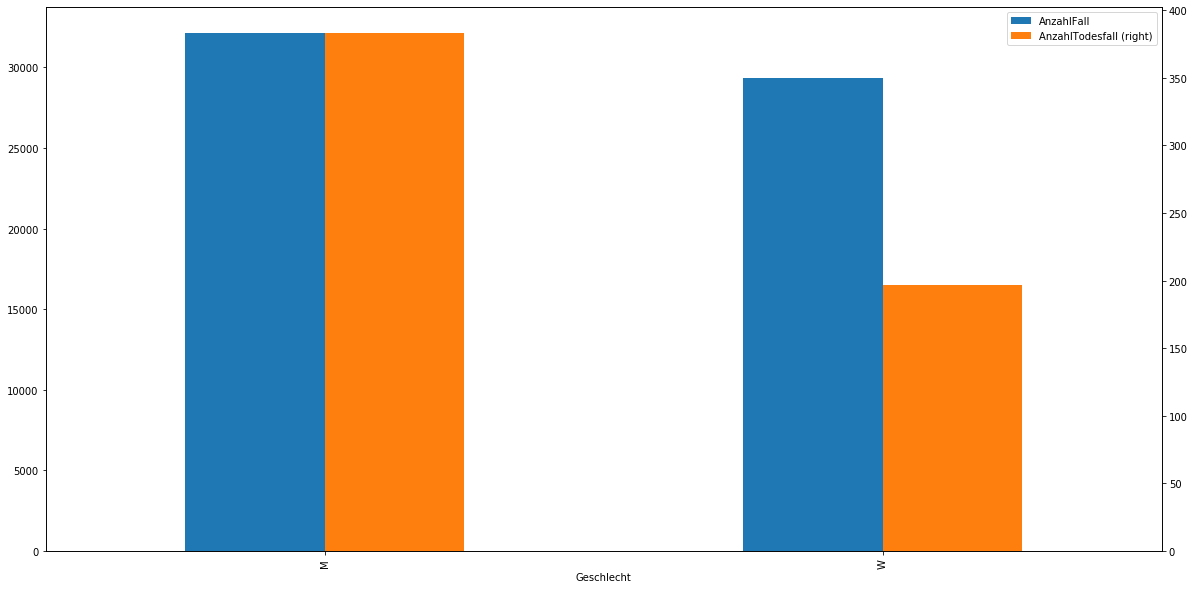

In [11]:
plots = RKIData.groupby(['Geschlecht']).sum().plot(kind="bar",figsize=(20,10),secondary_y="AnzahlTodesfall")

plots.get_figure().savefig('geschlecht.png',dpi=200,pad_inches=5)

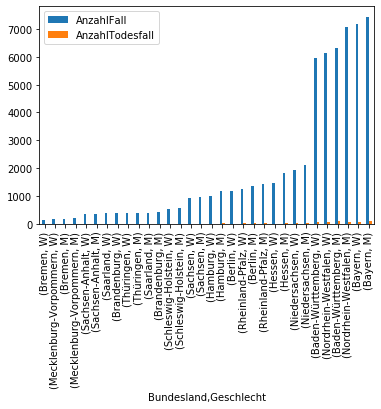

In [12]:
RKIData.groupby(['Bundesland','Geschlecht']).sum().sort_values(by="AnzahlFall").plot(kind="bar")

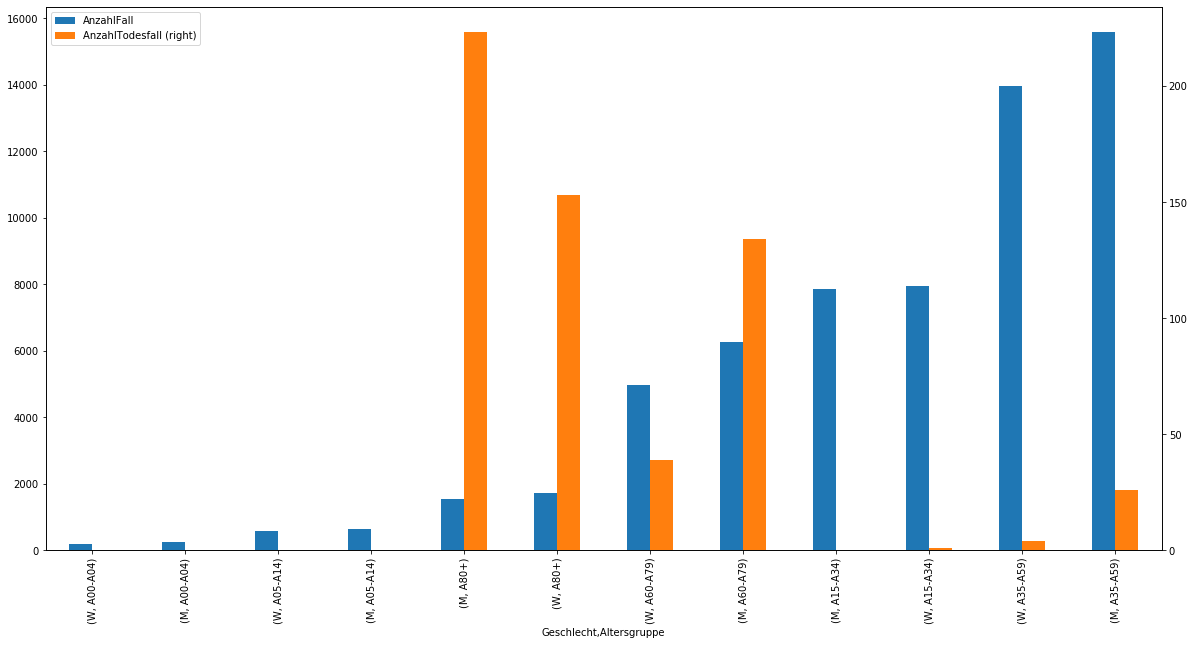

In [13]:
GADaten = RKIData.groupby(['Geschlecht','Altersgruppe']).sum().sort_values(by=["AnzahlFall"])

thePlotGADaten = GADaten.plot(kind="bar",secondary_y="AnzahlTodesfall",figsize=(20,10))

thePlotGADaten.get_figure().savefig('geschlecht-altersgruppe.png',dpi=200,pad_inches=5)


In [14]:
RKIData.groupby(['Bundesland','Altersgruppe']).sum().sort_values(by=["Bundesland","AnzahlTodesfall"])

AnzahlFall  AnzahlTodesfall
Bundesland             Altersgruppe                             
Baden-Württemberg      A00-A04               94                0
                       A05-A14              218                0
                       A15-A34             3060                0
                       A35-A59             5772                5
                       A60-A79             2440               55
                       A80+                 678              104
Bayern                 A00-A04              146                0
                       A05-A14              406                0
                       A15-A34             3792                1
                       A35-A59             6677                8
                       A60-A79             2624               41
                       A80+                 981              110
Berlin                 A00-A04               30                0
                       A05-A14               69                0
                       A15-A34              933                0
                       A35-A59             1147                2
                       A60-A79              309                2
                       A80+                  65                9
Brandenburg            A00-A04                3                0
                       A05-A14               12                0
                       A15-A34              175                0
                       A35-A59              423                0
                       A60-A79              161                0
                       A80+                  24                2
Bremen                 A00-A04                1                0
                       A05-A14                3                0
                       A15-A34               81                0
                       A35-A59              131                1
                       A60-A79               63                1
                       A80+                  11                2
Hamburg                A00-A04               18                0
                       A05-A14               76                0
                       A15-A34              706                0
                       A35-A59              997                1
                       A80+                  72                3
                       A60-A79              306                5
Hessen                 A00-A04               15                0
                       A05-A14               43                0
                       A15-A34              759                0
                       A35-A59             1741                1
                       A60-A79              591                5
                       A80+                 121               11
Mecklenburg-Vorpommern A05-A14                6                0
                       A15-A34              120                0
                       A60-A79               60                0
                       A80+                  13                0
                       A35-A59              166                1
Niedersachsen          A00-A04               21                0
                       A05-A14               67                0
                       A15-A34              964                0
                       A35-A59             1944                2
                       A60-A79              795                8
                       A80+                 246               24
Nordrhein-Westfalen    A00-A04               69                0
                       A05-A14              171                0
                       A15-A34             3209                0
                       A35-A59             6695                5
                       A60-A79             2403               35
                       A80+                 647               77
Rheinland-Pfalz        A00-A04               16                0
       

In [15]:
RKIData.groupby(['Landkreis','Altersgruppe','Geschlecht']).sum().sort_values(by=["AnzahlFall"])[-10:]

AnzahlFall  AnzahlTodesfall
Landkreis    Altersgruppe Geschlecht                             
LK Heinsberg A35-A59      W                  272                0
SK Köln      A35-A59      M                  274                0
SK Hamburg   A15-A34      W                  342                0
                          M                  364                0
SK München   A15-A34      M                  411                0
                          W                  427                0
SK Hamburg   A35-A59      W                  459                0
SK München   A35-A59      W                  530                0
SK Hamburg   A35-A59      M                  538                1
SK München   A35-A59      M                  609                1

In [16]:
RKIData.loc[RKIData['Landkreis'] == "LK Heinsberg"].groupby(['Altersgruppe','Geschlecht']).sum()

AnzahlFall  AnzahlTodesfall
Altersgruppe Geschlecht                             
A00-A04      M                    5                0
             W                    4                0
A05-A14      M                    5                0
             W                    7                0
A15-A34      M                  136                0
             W                  170                0
A35-A59      M                  244                0
             W                  272                0
A60-A79      M                  149                3
             W                  130                6
A80+         M                   57               13
             W                   55               10

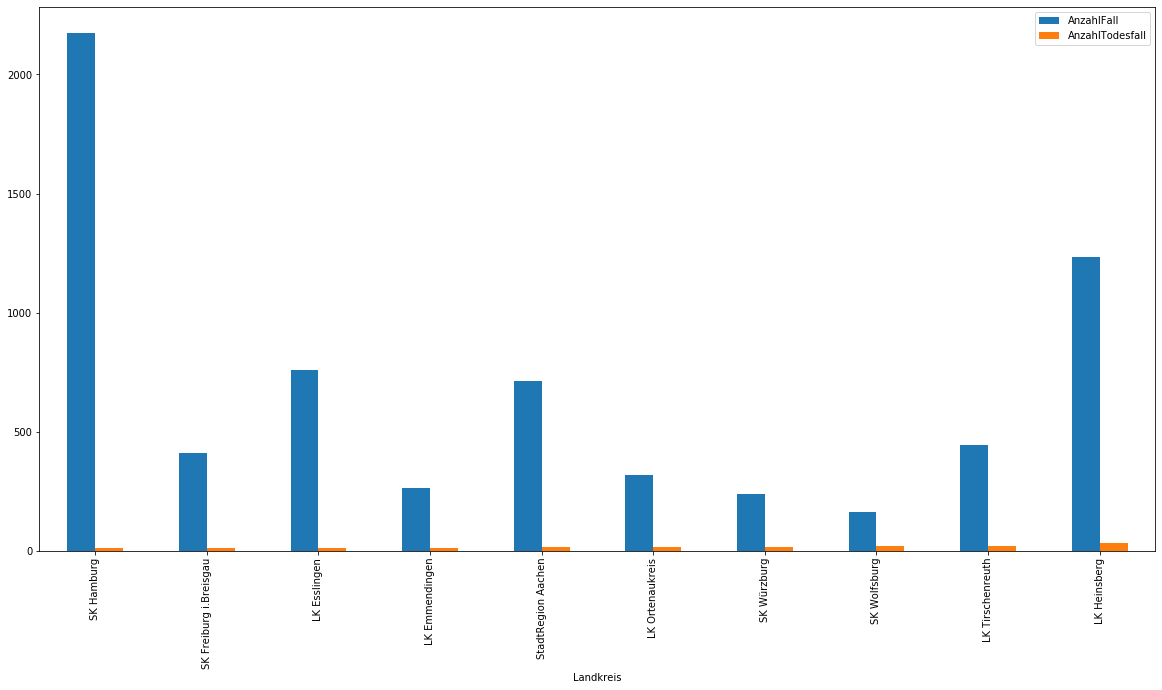

In [17]:
LandkreisTodesfall = RKIData.groupby(['Landkreis']).sum().sort_values(by=["AnzahlTodesfall"])[-10:].plot(kind="bar",figsize=(20,10))

LandkreisTodesfall.get_figure().savefig('todesfall-landkreis.png',dpi=200,pad_inches=5)


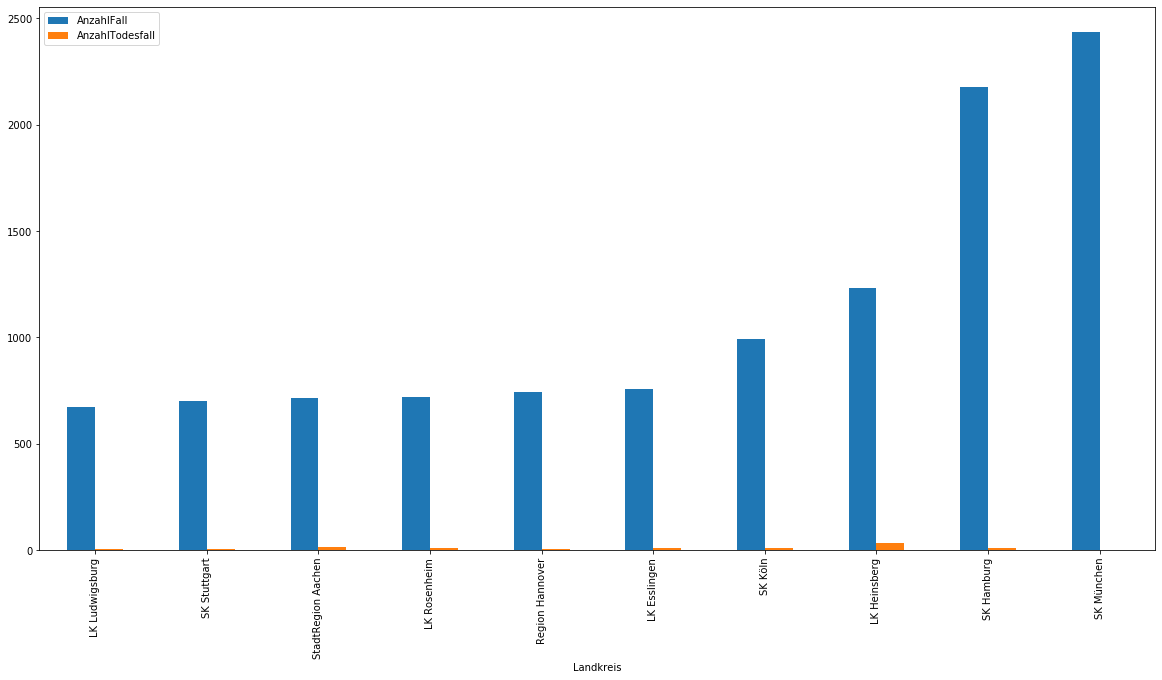

In [18]:
LandkreisTodesfall = RKIData.groupby(['Landkreis']).sum().sort_values(by=["AnzahlFall"])[-10:].plot(kind="bar",figsize=(20,10))

LandkreisTodesfall.get_figure().savefig('fall-landkreis.png',dpi=200,pad_inches=5)


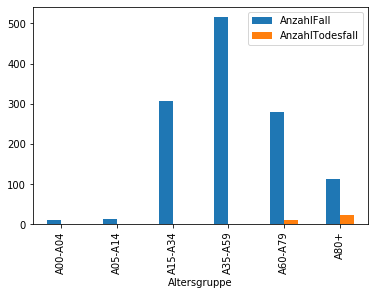

In [19]:
RKIData.loc[RKIData['Landkreis'] == "LK Heinsberg"].groupby(['Altersgruppe']).sum().plot(kind="bar")

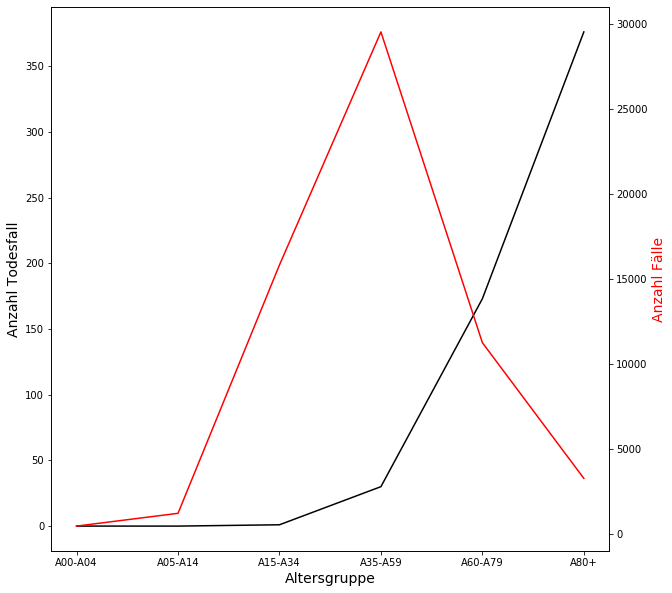

In [20]:
frame = RKIData.groupby(['Altersgruppe']).sum().reset_index()

fig,ax = plt.subplots(figsize=(10,10))
ax.plot(frame['Altersgruppe'], frame['AnzahlTodesfall'], color="black")
ax.set_xlabel("Altersgruppe",fontsize=14)
ax.set_ylabel("Anzahl Todesfall",color="black",fontsize=14)

ax2=ax.twinx()
ax2.plot(frame['Altersgruppe'], frame['AnzahlFall'],color="red")
ax2.set_ylabel("Anzahl Fälle",color="red",fontsize=14)

fig.savefig('data.png',dpi=200,pad_inches=5) # Bild Speichern


In [21]:
frame.head()

Altersgruppe  AnzahlFall  AnzahlTodesfall
0      A00-A04         452                0
1      A05-A14        1203                0
2      A15-A34       15809                1
3      A35-A59       29515               30
4      A60-A79       11238              173

Vielen Dank fürs Lesen

https://hellocoding.de/impressum

https://hellocoding.de/datenschutz

https://hellocoding.de/blog/coding-language/python/covid-19-data-science